# Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib as mpl
mpl.style.use("seaborn")


# Analisando os erros de sintaxe

## Montando o DataFrame com os erros de sintaxe

In [2]:
nome_exercicio="gaussiana"

In [3]:
json_results= "exercicios/analise-exercicios/"+ nome_exercicio + "/resultado_detalhado.json"
json_results

'exercicios/analise-exercicios/gaussiana/resultado_detalhado.json'

In [4]:
df_exs = pd.read_json(json_results, orient='records')
df_exs = df_exs.rename(columns = {'id':'id','erros':'tipo_do_erro', 'resultado':'passou'})


In [5]:
#df_exs=df_exs.set_index('id')
df_exs.tail(4)

,detalhes,tipo_do_erro,id,linha,passou
2313,[('line 6\n return a * b\n ^\nSynta...,SyntaxError: invalid syntax,ch3_2020_03_04_20_08_39_273348.py,'line 6,False
2314,[('line 1\n def x\n ^\nSyntaxError: ...,SyntaxError: invalid syntax,ch3_2019_09_11_23_12_24_127271.py,'line 1,False
2315,[('line 4\n B = math.e^(0.5*((x-mi)/sigma)^...,SyntaxError: invalid syntax,ch3_2020_03_04_19_49_40_592877.py,'line 4,False
2316,[ in test_1\nAssertionError: <|><Verificar qua...,AssertionError: <|><Verificar quando x ou mi é...,ch3_2020_09_04_16_47_36_060892.py,,False


In [6]:
df_erros=df_exs[df_exs['passou']==False]

df_erros.head()

,detalhes,tipo_do_erro,id,linha,passou
1,[('line 3\n y=((1/σ*(2import.pi)**1/2)impor...,SyntaxError: invalid syntax,ch3_2019_08_13_16_52_03_378932.py,'line 3,False
2,[ in calcula_gaussiana\nTypeError: \'float\' o...,TypeError: \'float\' object is not callable,ch3_2020_03_09_19_11_49_185208.py,,False
3,[('line 3\n if x\n ^\nSyntaxError: in...,SyntaxError: invalid syntax,ch3_2020_02_28_17_44_32_436097.py,'line 3,False
4,[('line 3\n y=1/(sigma*(2*math.pi)**0.5)mat...,SyntaxError: invalid syntax,ch3_2019_03_01_12_59_50_648548.py,'line 3,False
5,[ in calcula_gaussiana\nTypeError: \'float\' o...,TypeError: \'float\' object is not callable,ch3_2020_02_20_00_11_13_695953.py,,False


In [7]:
df_sintaxe = df_erros[df_erros['tipo_do_erro'].str.contains("SyntaxError", na=False)]
df_sintaxe

,detalhes,tipo_do_erro,id,linha,passou
1,[('line 3\n y=((1/σ*(2import.pi)**1/2)impor...,SyntaxError: invalid syntax,ch3_2019_08_13_16_52_03_378932.py,'line 3,False
3,[('line 3\n if x\n ^\nSyntaxError: in...,SyntaxError: invalid syntax,ch3_2020_02_28_17_44_32_436097.py,'line 3,False
4,[('line 3\n y=1/(sigma*(2*math.pi)**0.5)mat...,SyntaxError: invalid syntax,ch3_2019_03_01_12_59_50_648548.py,'line 3,False
7,[1))\n ^\nSyntaxError: invalid syntax\n'],SyntaxError: invalid syntax,ch3_2020_03_18_23_48_15_310305.py,('line 10,False
11,[ line 6\n return (1/sigma*math.sqrt(2*math...,SyntaxError: unexpected EOF while parsing,ch3_2019_03_30_20_28_09_678811.py,line 6,False
17,[ pi\n ^\nSyntaxError: invalid sy...,SyntaxError: invalid syntax,ch3_2020_03_09_13_49_29_497280.py,('line 1,False
23,[('line 1\n Import numpy as np\n ...,SyntaxError: invalid syntax,ch3_2020_09_21_18_42_03_389570.py,'line 1,False
24,[ 11)\n ^\nSyntaxErro...,SyntaxError: invalid syntax,ch3_2020_08_04_15_47_57_054802.py,('line 5,False
26,[('line 3\n f=(1/σ*(2* math.pi)**(1/2))*mat...,SyntaxError: invalid syntax,ch3_2019_08_12_17_09_58_433774.py,'line 3,False
32,[5((x-mi)/sigma)*2)\n ^\nSynt...,SyntaxError: invalid syntax,ch3_2020_09_29_19_01_20_963868.py,('line 2,False


In [8]:
df_sintaxe["erro"]="--"
df_sintaxe["possivel_solucao"]="--"

In [9]:
df_sintaxe.head()

,detalhes,tipo_do_erro,id,linha,passou,erro,possivel_solucao
1,[('line 3\n y=((1/σ*(2import.pi)**1/2)impor...,SyntaxError: invalid syntax,ch3_2019_08_13_16_52_03_378932.py,'line 3,False,--,--
3,[('line 3\n if x\n ^\nSyntaxError: in...,SyntaxError: invalid syntax,ch3_2020_02_28_17_44_32_436097.py,'line 3,False,--,--
4,[('line 3\n y=1/(sigma*(2*math.pi)**0.5)mat...,SyntaxError: invalid syntax,ch3_2019_03_01_12_59_50_648548.py,'line 3,False,--,--
7,[1))\n ^\nSyntaxError: invalid syntax\n'],SyntaxError: invalid syntax,ch3_2020_03_18_23_48_15_310305.py,('line 10,False,--,--
11,[ line 6\n return (1/sigma*math.sqrt(2*math...,SyntaxError: unexpected EOF while parsing,ch3_2019_03_30_20_28_09_678811.py,line 6,False,--,--


## Adicionando os IDs dos usuários ao dataframe

In [10]:
import os

def list_files(dir):
    r = []
    for root, dirs, files in os.walk(dir):
        for name in files:
            r.append(os.path.join(root, name))
    return r

In [11]:
dir = r"C:\Users\gabic\Documents\NINJA_DeSoft\submissoes_servidor\backup"
files = list_files(dir)

In [12]:
lista_files = []
for f in files:
    f = f[65:]
    f.replace("//","/")
    lista_files.append(f)
    
lista_files= lista_files[1:]

In [14]:
df_sintaxe["usuario"]="--"
for ind in df_sintaxe.index: 
        for l in lista_files:
            user = l[0:8]
            ex = l[9:]
            if ex == df_sintaxe["id"][ind]:
                df_sintaxe["usuario"][ind] = user
#                 print(user)
#                 print(ex)


In [15]:
df_sintaxe

,detalhes,tipo_do_erro,id,linha,passou,erro,possivel_solucao,usuario
1,[('line 3\n y=((1/σ*(2import.pi)**1/2)impor...,SyntaxError: invalid syntax,ch3_2019_08_13_16_52_03_378932.py,'line 3,False,--,--,user_086
3,[('line 3\n if x\n ^\nSyntaxError: in...,SyntaxError: invalid syntax,ch3_2020_02_28_17_44_32_436097.py,'line 3,False,--,--,user_321
4,[('line 3\n y=1/(sigma*(2*math.pi)**0.5)mat...,SyntaxError: invalid syntax,ch3_2019_03_01_12_59_50_648548.py,'line 3,False,--,--,user_236
7,[1))\n ^\nSyntaxError: invalid syntax\n'],SyntaxError: invalid syntax,ch3_2020_03_18_23_48_15_310305.py,('line 10,False,--,--,user_230
11,[ line 6\n return (1/sigma*math.sqrt(2*math...,SyntaxError: unexpected EOF while parsing,ch3_2019_03_30_20_28_09_678811.py,line 6,False,--,--,user_154
17,[ pi\n ^\nSyntaxError: invalid sy...,SyntaxError: invalid syntax,ch3_2020_03_09_13_49_29_497280.py,('line 1,False,--,--,user_192
23,[('line 1\n Import numpy as np\n ...,SyntaxError: invalid syntax,ch3_2020_09_21_18_42_03_389570.py,'line 1,False,--,--,user_104
24,[ 11)\n ^\nSyntaxErro...,SyntaxError: invalid syntax,ch3_2020_08_04_15_47_57_054802.py,('line 5,False,--,--,user_051
26,[('line 3\n f=(1/σ*(2* math.pi)**(1/2))*mat...,SyntaxError: invalid syntax,ch3_2019_08_12_17_09_58_433774.py,'line 3,False,--,--,user_370
32,[5((x-mi)/sigma)*2)\n ^\nSynt...,SyntaxError: invalid syntax,ch3_2020_09_29_19_01_20_963868.py,('line 2,False,--,--,user_060


# Analisando e classificando os erros

In [16]:
def find_between( s, first, last ):
    try:
        start = s.index( first ) + len( first )
        end = s.index( last, start )
        return s[start:end]
    except ValueError:
        return ""


In [17]:
d=[]
l=[]
i=[]
e=[]
log=[]
for ind in df_sintaxe.index: 
    line = df_sintaxe["linha"][ind]
    det = df_sintaxe["detalhes"][ind]
    df_sintaxe["linha"][ind]=line
    
    line=line.replace("(","")
    line=line.replace("('","")
    df_sintaxe["linha"][ind]=line

#     error=df_sintaxe["erros"][ind]
    if str("line") not in line:
        df_sintaxe["linha"][ind]= "--"
    for x in det:
        x=x.replace("\\n","")
        x=x.replace("   ^","")
        details = find_between(x, "line", "SyntaxError" )
#         print(details[2:])
        df_sintaxe["erro"][ind]=details[4:]
#         det_list=x.split()
#         for d in det_list:
#             if "*" in d:
#                 print("")
#             else:
#                print(x)
#         print(det_list)
#         if ("*") in det_list[2]:
#             print(" ")
#         else:
#             print(det_list)
#        df_sintaxe["erro"]=det_list[2]
#             print(" ")            
#         print (det)
        
#         print(x)
        if "SyntaxError" in x:
            detail=x[x.index("SyntaxError:") + len("SyntaxError:"):]
            detail=detail.replace("'", "")
            detail=detail.replace(")", "")
            df_sintaxe["detalhes"][ind]=detail


#         if det not in d:         
# #             d.append(det)
#             strdet=str(det)
#             strdet=strdet.replace("  ","")
#             det_filtrado = strdet.split(r"\\n")
#             d.append(det_filtrado)
# #             for detalhe in (det):
# #                 print(detalhe)
            
#         l.append("["+ line+ "]")
#         i.append("["+ str(ind)+ "]")
# #         print(df_sintaxe.loc[[ind]])
#         log.append(df_sintaxe.loc[[ind]])
#         e.append(error)
        

In [18]:
df_sintaxe

,detalhes,tipo_do_erro,id,linha,passou,erro,possivel_solucao,usuario
1,invalid syntax,SyntaxError: invalid syntax,ch3_2019_08_13_16_52_03_378932.py,'line 3,False,y=((1/σ*(2import.pi)**1/2)import exp(-0.5(x-...,--,user_086
3,invalid syntax,SyntaxError: invalid syntax,ch3_2020_02_28_17_44_32_436097.py,'line 3,False,if x,--,user_321
4,invalid syntax,SyntaxError: invalid syntax,ch3_2019_03_01_12_59_50_648548.py,'line 3,False,y=1/(sigma*(2*math.pi)**0.5)math.e**(-0.5*((...,--,user_236
7,invalid syntax,SyntaxError: invalid syntax,ch3_2020_03_18_23_48_15_310305.py,'line 10,False,,--,user_230
11,unexpected EOF while parsing,SyntaxError: unexpected EOF while parsing,ch3_2019_03_30_20_28_09_678811.py,line 6,False,return (1/sigma*math.sqrt(2*math.pi))*math.e...,--,user_154
17,invalid syntax,SyntaxError: invalid syntax,ch3_2020_03_09_13_49_29_497280.py,'line 1,False,,--,user_192
23,invalid syntax,SyntaxError: invalid syntax,ch3_2020_09_21_18_42_03_389570.py,'line 1,False,Import numpy as np,--,user_104
24,invalid syntax,SyntaxError: invalid syntax,ch3_2020_08_04_15_47_57_054802.py,'line 5,False,,--,user_051
26,invalid syntax,SyntaxError: invalid syntax,ch3_2019_08_12_17_09_58_433774.py,'line 3,False,f=(1/σ*(2* math.pi)**(1/2))*math.exp(-0.5*((...,--,user_370
32,invalid syntax,SyntaxError: invalid syntax,ch3_2020_09_29_19_01_20_963868.py,'line 2,False,,--,user_060


In [19]:
erro_import=0
erro_antes_do_return=0
erro_parenteses=0
erro_potencia=0
erro_if=0
erro_while=0
erro_for=0
erro_def=0
erro_pi=0
erro_vezes=0

In [20]:
lista_tipos_erros=[]
for ind in df_sintaxe.index: 
    sol='--'
    erro = df_sintaxe["erro"][ind]
    erro=str(erro)
    
    if "return" in erro and len(erro)<30:
        sol="Verifique a linha antes do return"
        erro_antes_do_return+=1
    if "import" in erro or "Import" in erro:
        sol="Verifique a maneira com que está realizando o import"
        erro_import+=1
    if "(" in erro:
        abre_parenteses=erro.count('(')
        fecha_parenteses=erro.count(')')
        if abre_parenteses>fecha_parenteses:
            sol="Faltou fechar um parênteses"
        elif abre_parenteses<fecha_parenteses:
            sol="Faltou abrir um parênteses"
        erro_parenteses+=1
        
    if "^" in erro:
        sol="Potência em Python é: **"
        erro_potencia+=1
        
    if "if" in erro and ":" not in erro:
        sol="Faltou ':' na linha do 'if'"
        erro_if+=1
        
    if "while" in erro and ":" not in erro:
        sol="Faltou ':' na linha do 'while'"
        erro_while+=1
        
    if "for" in erro and ":" not in erro:
        sol="Faltou ':' na linha do 'for'"
        erro_for+=1
        
    if "def" in erro and ":" not in erro:
        sol="Faltou ':' na linha do 'def'"
        erro_def+=1
        
    if "π" in erro:
        sol="π é math.pi"
        erro_pi+=1
        
    if ")(" in erro:
        sol="esqueceu o sinal de *"
        erro_vezes+=1
        
    else:
        lista_tipos_erros.append(erro)
        
    df_sintaxe["possivel_solucao"][ind]= sol
        
    
        
    
    
    

In [21]:
erros = {'tipos': ["erro_import", "erro_antes_do_return", "erro_parenteses", "erro_potencia", "erro_if", "erro_while", "erro_for", "erro_def", "erro_pi", "erro_vezes"],
        'quantidade': [erro_import,erro_antes_do_return,erro_parenteses,erro_potencia,erro_if, erro_while,erro_for, erro_def, erro_pi,erro_vezes]
        }

df_classificacao = pd.DataFrame(erros, columns = ['tipos', 'quantidade'])


In [25]:
df_sintaxe

,detalhes,tipo_do_erro,id,linha,passou,erro,possivel_solucao,usuario
1,invalid syntax,SyntaxError: invalid syntax,ch3_2019_08_13_16_52_03_378932.py,'line 3,False,y=((1/σ*(2import.pi)**1/2)import exp(-0.5(x-...,Verifique a maneira com que está realizando o ...,user_086
3,invalid syntax,SyntaxError: invalid syntax,ch3_2020_02_28_17_44_32_436097.py,'line 3,False,if x,Faltou ':' na linha do 'if',user_321
4,invalid syntax,SyntaxError: invalid syntax,ch3_2019_03_01_12_59_50_648548.py,'line 3,False,y=1/(sigma*(2*math.pi)**0.5)math.e**(-0.5*((...,--,user_236
7,invalid syntax,SyntaxError: invalid syntax,ch3_2020_03_18_23_48_15_310305.py,'line 10,False,,--,user_230
11,unexpected EOF while parsing,SyntaxError: unexpected EOF while parsing,ch3_2019_03_30_20_28_09_678811.py,line 6,False,return (1/sigma*math.sqrt(2*math.pi))*math.e...,Faltou fechar um parênteses,user_154
17,invalid syntax,SyntaxError: invalid syntax,ch3_2020_03_09_13_49_29_497280.py,'line 1,False,,--,user_192
23,invalid syntax,SyntaxError: invalid syntax,ch3_2020_09_21_18_42_03_389570.py,'line 1,False,Import numpy as np,Verifique a maneira com que está realizando o ...,user_104
24,invalid syntax,SyntaxError: invalid syntax,ch3_2020_08_04_15_47_57_054802.py,'line 5,False,,--,user_051
26,invalid syntax,SyntaxError: invalid syntax,ch3_2019_08_12_17_09_58_433774.py,'line 3,False,f=(1/σ*(2* math.pi)**(1/2))*math.exp(-0.5*((...,--,user_370
32,invalid syntax,SyntaxError: invalid syntax,ch3_2020_09_29_19_01_20_963868.py,'line 2,False,,--,user_060


In [22]:
df_classificacao.set_index("tipos")

,quantidade
tipos,
erro_import,35
erro_antes_do_return,190
erro_parenteses,219
erro_potencia,3
erro_if,8
erro_while,0
erro_for,5
erro_def,1
erro_pi,11


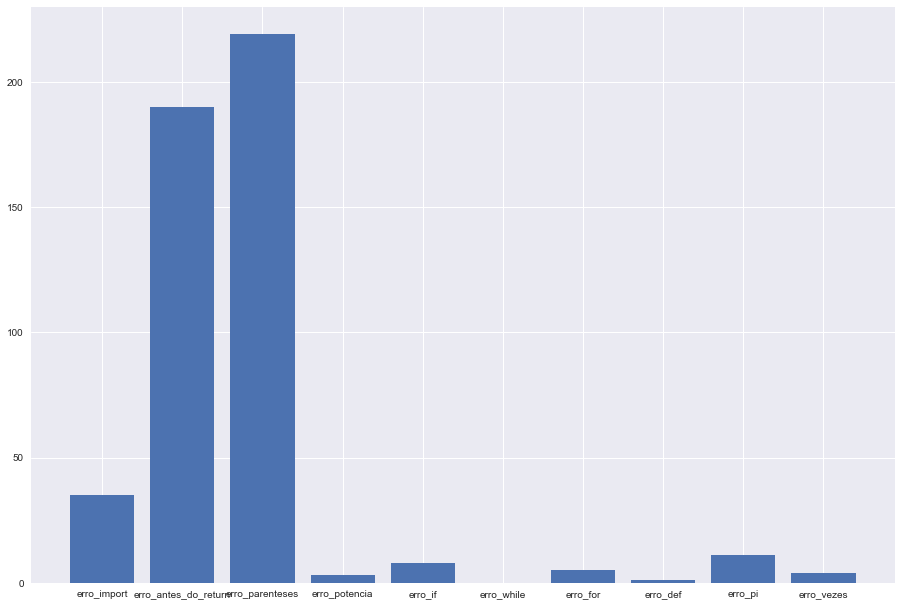

In [23]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_axes([0,0,1,1])
ax.bar(df_classificacao["tipos"], df_classificacao["quantidade"])
plt.show()

In [33]:
# f, ax = plt.subplots(figsize = (32,20))
# plt.figure(figsize = (640,200))
erros = df_sintaxe["possivel_solucao"]
users = df_sintaxe["usuario"]
table = pd.crosstab(erros, users)
# plot=sns.heatmap(table,ax=ax, annot=True, cmap="YlGnBu")
# f.savefig("heatmap.png", dpi=200)
table

usuario,user_003,user_004,user_006,user_007,user_009,user_011,user_012,user_013,user_014,user_016,...,user_374,user_378,user_379,user_383,user_385,user_386,user_391,user_393,user_395,user_399
possivel_solucao,,,,,,,,,,,,,,,,,,,,,
--,0,0,0,1,1,2,0,1,1,1,...,0,0,1,2,1,1,2,0,2,1
Faltou ':' na linha do 'def',0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Faltou ':' na linha do 'for',0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Faltou ':' na linha do 'if',0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Faltou abrir um parênteses,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
Faltou fechar um parênteses,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Potência em Python é: **,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
Verifique a linha antes do return,2,4,3,0,0,0,2,0,0,0,...,0,0,1,0,0,0,0,1,0,0
Verifique a maneira com que está realizando o import,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0


## Digite o ID de um usuário para descobrir seus principais erros

### Selecione o usuário:

In [34]:
usuario = "user_086"

In [35]:
table[usuario]

possivel_solucao
--                                                      3
Faltou ':' na linha do 'def'                            0
Faltou ':' na linha do 'for'                            0
Faltou ':' na linha do 'if'                             0
Faltou abrir um parênteses                              0
Faltou fechar um parênteses                             0
Potência em Python é: **                                0
Verifique a linha antes do return                       1
Verifique a maneira com que está realizando o import    8
esqueceu o sinal de *                                   0
π é math.pi                                             1
Name: user_086, dtype: int64

In [39]:
errors = df_sintaxe.loc[df_sintaxe["usuario"]==usuario]
errors.loc[:, ["erro", "linha","linha","detalhes","possivel_solucao"]]

,erro,linha,linha,detalhes,possivel_solucao
1,y=((1/σ*(2import.pi)**1/2)import exp(-0.5(x-...,'line 3,'line 3,invalid syntax,Verifique a maneira com que está realizando o ...
196,y=((1/σ(2import pi)**1/2)import exp(-0.5(x-μ...,'line 3,'line 3,invalid syntax,Verifique a maneira com que está realizando o ...
251,,'line 1,'line 1,invalid syntax,--
566,y=(1/σ*(2*import.pi)**(1/2)import.exp(-0.5(x...,'line 3,'line 3,invalid syntax,Verifique a maneira com que está realizando o ...
676,y=((1/σ*(2import.pi)**1/2)import.exp(-0.5(x-...,'line 3,'line 3,invalid syntax,Verifique a maneira com que está realizando o ...
869,y=((1/σ(2import pi)**1/2)import exp(-0.5(x-μ...,'line 3,'line 3,invalid syntax,Verifique a maneira com que está realizando o ...
1097,,'line 2,'line 2,invalid syntax,--
1136,y=1/σ*(2*import.pi)**(1/2)import.exp(-0.5(x-...,'line 3,'line 3,invalid syntax,Verifique a maneira com que está realizando o ...
1588,y=1/(σ*(2*math.pi)**(1/2))math.exp(-0.5((x-μ...,'line 3,'line 3,invalid syntax,--
2065,y=((1/σ*(2*import.pi)**1/2)import.exp(-0.5(x...,'line 3,'line 3,invalid syntax,Verifique a maneira com que está realizando o ...
